<a href="https://colab.research.google.com/github/mathcute/Data-Science---Projects/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

df = pd.read_csv('/content/atlas2010_recorte.csv', delimiter = ',')

In [35]:
X = df[['espvida', 'fectot', 'mort1', 'razdep', 'e_anosestudo']]
y = df[['uf']]

In [36]:
np.unique(y)

array(['Acre', 'Amapa', 'Amazonas', 'Maranhao', 'Para', 'Piaui',
       'Rondonia', 'Roraima', 'Tocantins'], dtype=object)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

##Aplicando um modelo simples de árvore de decisão

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

##Gráfico da tree

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (200, 200))
plot_tree(clf, feature_names = ['espvida', 'fectot', 'mort1', 'razdep', 'e_anosestudo'], class_names=['Acre', 'Amapa', 'Amazonas', 'Maranhao', 'Para', 'Piaui',
       'Rondonia', 'Roraima', 'Tocantins'])
plt.show()

In [40]:
tree = clf.tree_
print(f'Número de nós: {tree.node_count}')
print(f'Profundidade máxima: {tree.max_depth}')

Número de nós: 395
Profundidade máxima: 16


##Calculando a acurácia

In [41]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred)

print(accuracy1)

0.602996254681648


##Limitando o número de nós folha da árvore

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf_limit_node = DecisionTreeClassifier(max_leaf_nodes = 5)
clf_limit_node.fit(X_train, y_train)

y_pred2 = clf_limit_node.predict(X_test)

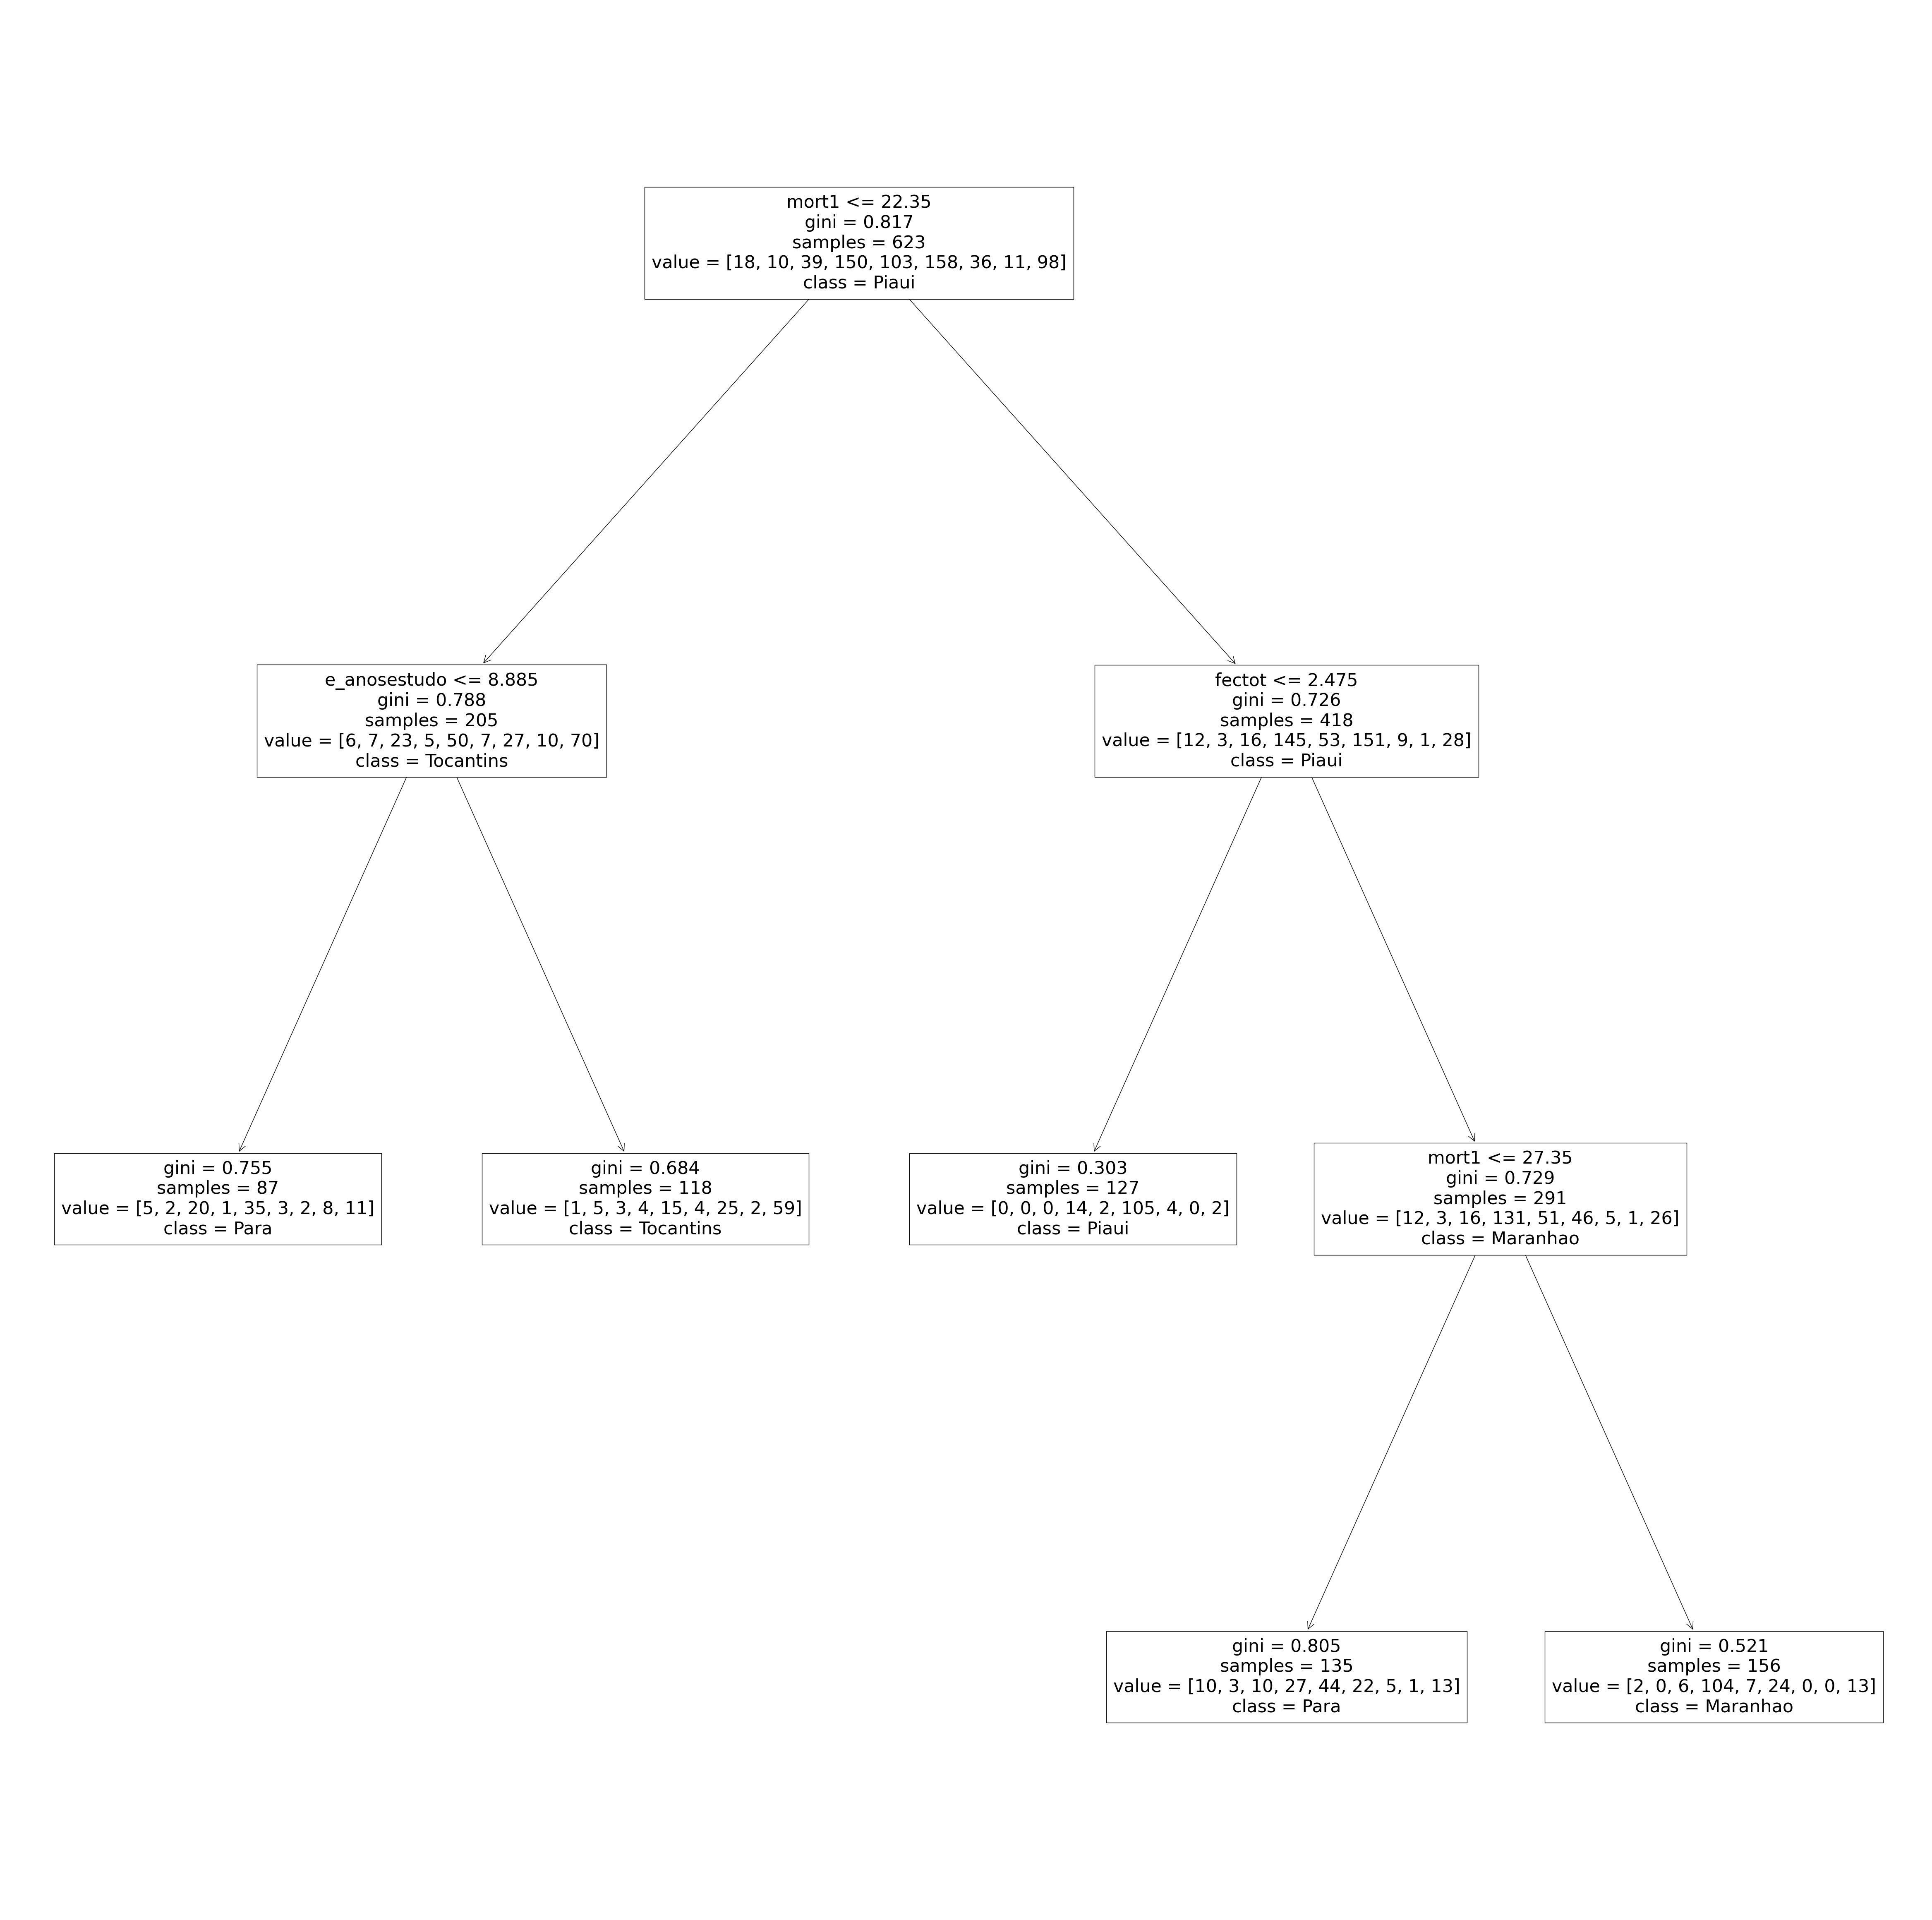

In [43]:
plt.figure(figsize = (60, 60))
plot_tree(clf_limit_node, feature_names = ['espvida', 'fectot', 'mort1', 'razdep', 'e_anosestudo'], class_names=['Acre', 'Amapa', 'Amazonas', 'Maranhao', 'Para', 'Piaui',
       'Rondonia', 'Roraima', 'Tocantins'])
plt.show()

##Calculando a acurácia com nós limitados

In [44]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(accuracy2)

0.5131086142322098


##Aplicando ID3 algoritmo de árvores de decisão

In [45]:
clf2 = DecisionTreeClassifier(criterion = 'entropy')
clf2.fit(X_train, y_train)

y_pred3 = clf2.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print(accuracy3)

0.651685393258427


##Trabalhando com florestas aleatórias (random forest)

Floresta Aleatória Classificadora

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators = 1000, random_state = 0)
clf3.fit(X_train, y_train)

y_pred4 = clf3.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred4)
print(accuracy4)

0.704119850187266


Floresta Aleatória Regressora

In [47]:
X2 = df[['fectot', 'mort1', 'razdep', 'e_anosestudo']]
y2 = df[['espvida']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

clf4 = RandomForestRegressor(n_estimators = 10000, random_state = 0)
clf4.fit(X_train2, y_train2)

y_pred5 = clf4.predict(X_test2)

r2 = r2_score(y_test2, y_pred5)
print(r2)

0.9726769449015702


##Comparando com um modelo de regressão linear múltipla

In [49]:
import statsmodels.formula.api as sm

model = sm.ols(formula = "espvida ~ mort1 + fectot + razdep + e_anosestudo", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                espvida   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     7001.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:16:13   Log-Likelihood:                -333.79
No. Observations:                 890   AIC:                             677.6
Df Residuals:                     885   BIC:                             701.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       77.7112      0.161    483.944   

##Modificando hiperparâmentros de florestas aleatórias

Profundidade máxima das árvores (max_depth)

In [50]:
clf5 = RandomForestRegressor(n_estimators = 1000, max_depth = 10)
clf5.fit(X_train2, y_train2)

y_pred6 = clf5.predict(X_test2)

r2_2 = r2_score(y_test2, y_pred6)
print(r2_2)

0.9731016453132579


*Consegui um relacionado um pouco melhor mexendo nos hiperparâmetros, poderia mexer muito mais para ter resultados ainda melhores*

##Número minímo de amostras para dividir um nó

In [51]:
clf7 = RandomForestRegressor(n_estimators = 1000, random_state = 0, min_samples_split = 10)

clf7.fit(X_train2, y_train2)

y_pred8 = clf7.predict(X_test2)

r2_3 = r2_score(y_test2, y_pred8)
print(r2_3)

0.973597631757494


##Número minímo de amostras por folha

In [52]:
clf8 = RandomForestRegressor(n_estimators = 1000, random_state = 0, min_samples_leaf = 5)

clf8.fit(X_train2, y_train2)

y_pred9 = clf8.predict(X_test2)

r2_4 = r2_score(y_test2, y_pred9)
print(r2_4)

0.973412101230391


##Limitando número de nós folha

In [53]:
clf9 = RandomForestRegressor(n_estimators = 1000, random_state = 0, max_leaf_nodes = 30)

clf9.fit(X_train2, y_train2)

y_pred10 = clf9.predict(X_test2)

r2_5 = r2_score(y_test2, y_pred10)
print(r2_5)

0.972782674215704


##Número de árvores de decisão na floresta aleatória

In [63]:
clf10 = RandomForestRegressor(n_estimators = 2000, random_state = 0, max_leaf_nodes = 60)
clf10.fit(X_train2, y_train2)

y_pred11 = clf10.predict(X_test2)

r2_6 = r2_score(y_test2, y_pred11)
print(r2_6)

0.973112871846997


#**Depois dessa análise e trocas de hiperparâmetros, podemos fazer uma combinação de todos eles para termos um modelo mais "perfeito" possível.**